In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

Состав и названия полей:

In [52]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

график зависимости одной переменной от другой:

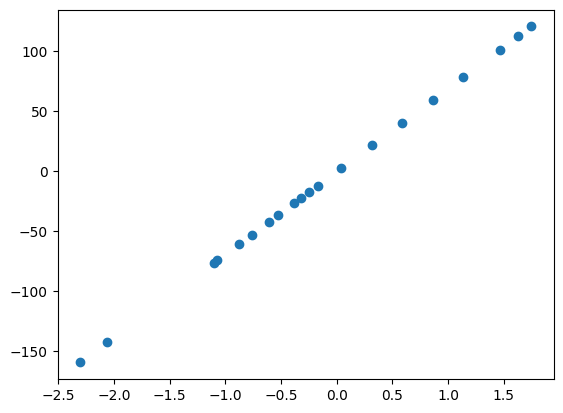

In [53]:
plt.figure()
plt.scatter(x, y)
plt.show()

объект регрессии и проверим начальное значение ошибки:

In [54]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


## Модель

In [55]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

error after gradient descent: 0.03937321303112905


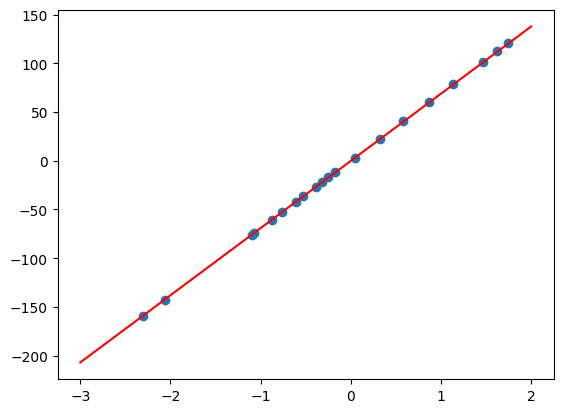

In [56]:
hyp = Model(0, 0)
steps, errors = hyp.fit(x, y, 0.001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

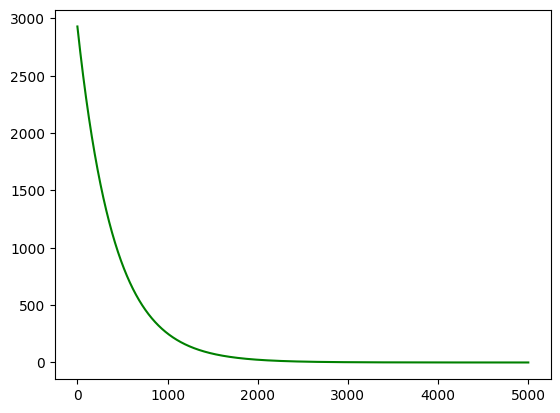

In [57]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

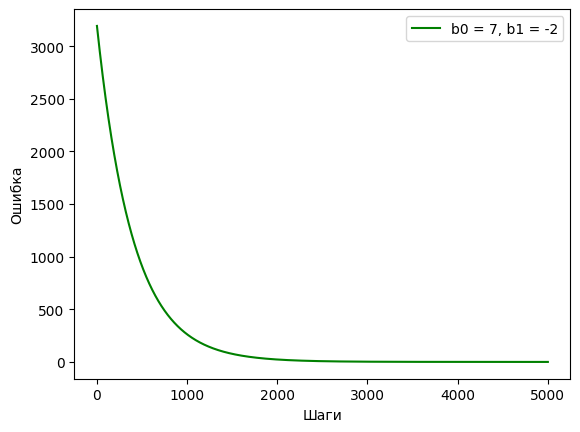

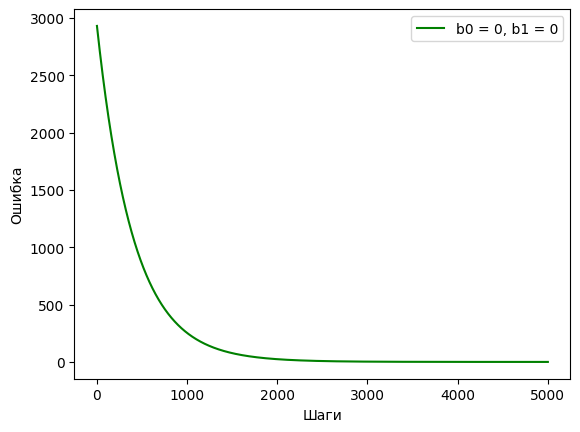

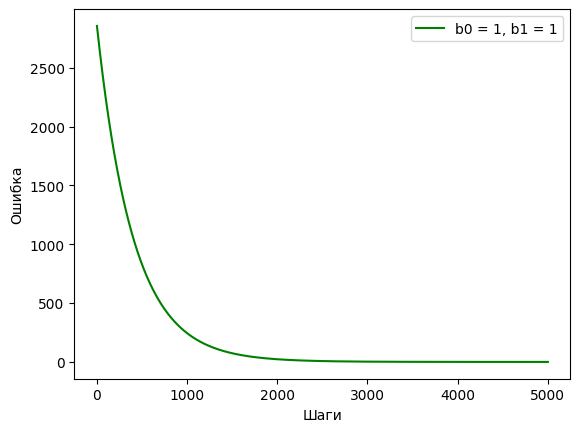

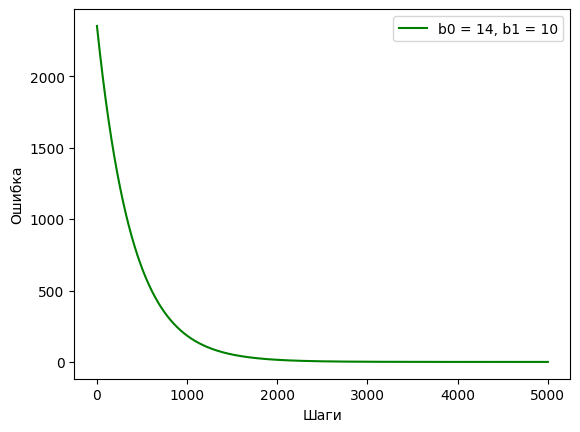

In [58]:
initial_params = [
    (7, -2),
    (0, 0),   # b0 = 0, b1 = 0
    (1, 1),   # b0 = 1, b1 = 1
    (14, 10),  # b0 = -1, b1 = 2
]

# Проверка для каждой комбинации начальных значений
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha=0.001)
    
    # Построение графика
    plt.figure()
    plt.plot(steps, errors, 'g', label=f'b0 = {b0}, b1 = {b1}')
    plt.xlabel('Шаги')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()



2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 

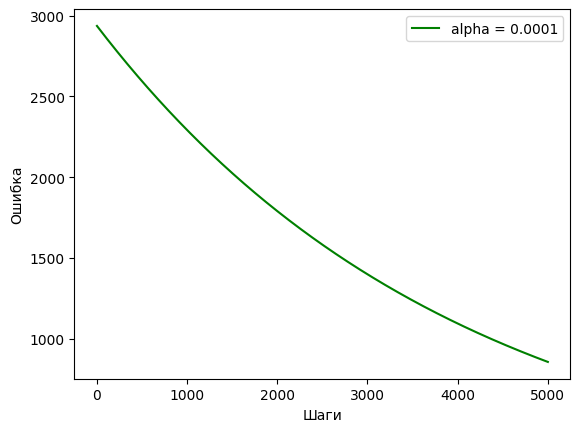

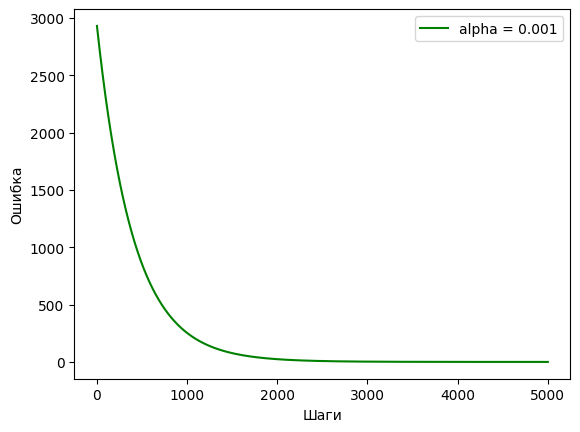

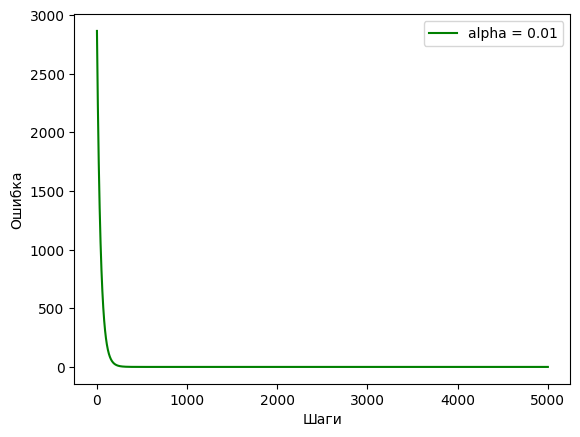

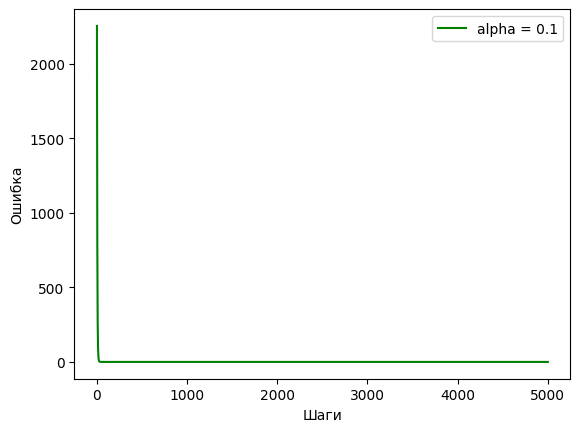

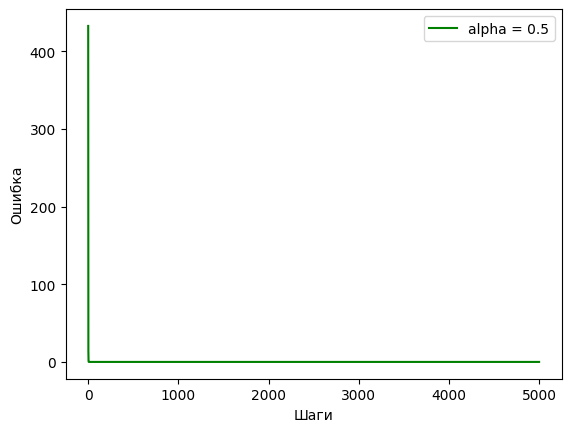

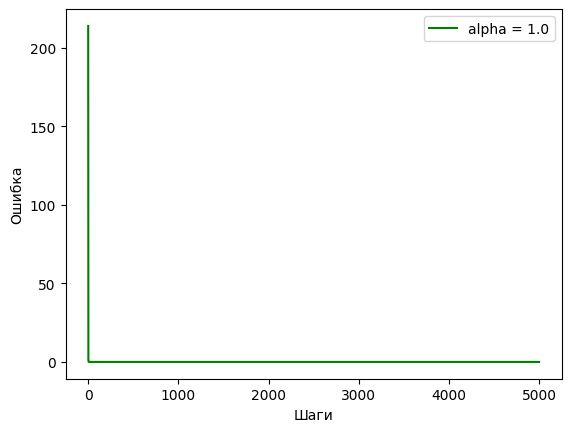

In [59]:
# Значения α для проверки
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]

# Проверка для каждого α
for alpha in alphas:
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)
    
    # Построение графика
    plt.figure()
    plt.plot(steps, errors, 'g', label=f'alpha = {alpha}')
    plt.xlabel('Шаги')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

Модель сходится для всех проверенных шагов alpha. Это подтверждает ее надежность

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спуска таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 

In [66]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 1]
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 1]
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 1]
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta = 1e-6):
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 1]
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 1]

        steps, errors = [], []
        step = 0
        prev_err = None
        start_b0, start_b1 = self.b0, self.b1

        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)

            # Проверяем, увеличилась ли ошибка
            if prev_err is not None and new_err > prev_err:
                # Если ошибка увеличилась, уменьшаем alpha и восстанавливаем параметры
                alpha /= 2
                self.b0, self.b1 = start_b0, start_b1
                continue

            if prev_err is not None and abs(prev_err-new_err) < min_delta:
                print('ended by unsignificant error')
                break
            prev_err=new_err

            step += 1
            steps.append(step)
            errors.append(new_err)
        print('ended by finishing max_steps')
        return steps, errors
    
    def plot(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors)
        plt.xlabel('Шаги')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

alpha = 0.0001
ended by finishing max_steps


C:\Users\Polyak\AppData\Local\Temp\ipykernel_15364\3423394442.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


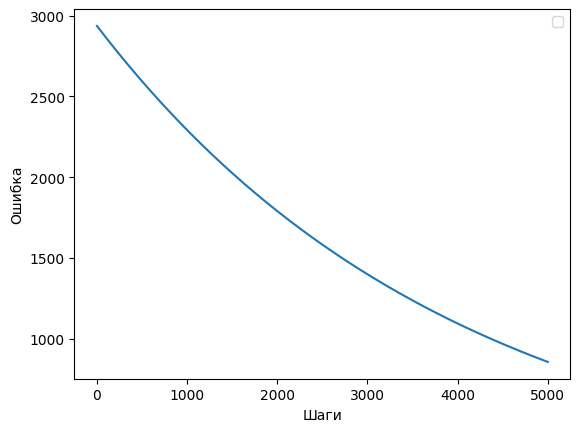

alpha = 0.001
ended by finishing max_steps


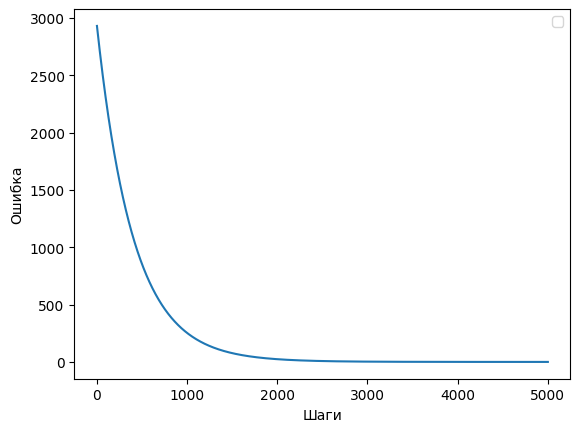

alpha = 0.01
ended by unsignificant error
ended by finishing max_steps


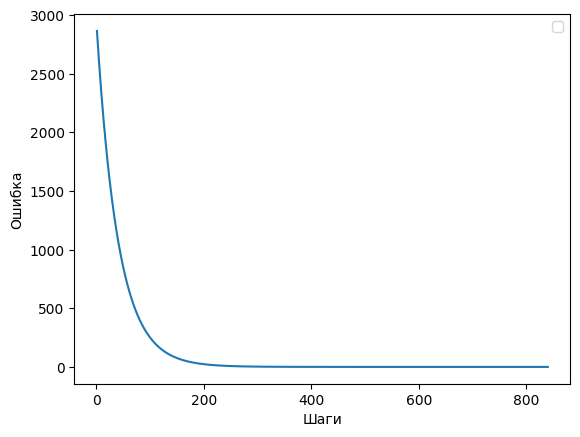

alpha = 0.1
ended by unsignificant error
ended by finishing max_steps


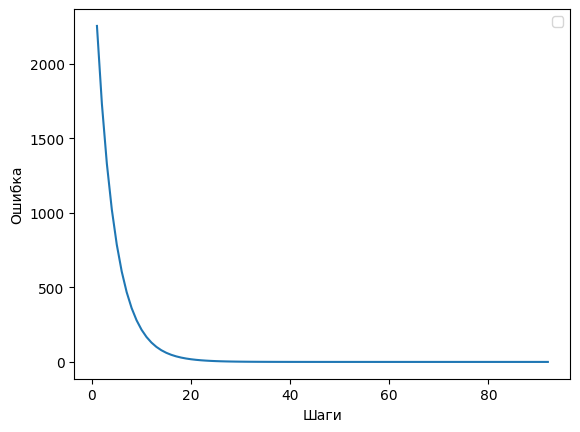

alpha = 0.5
ended by unsignificant error
ended by finishing max_steps


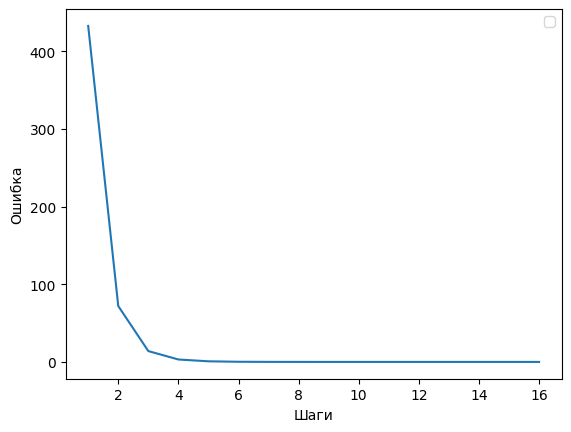

alpha = 1.0
ended by unsignificant error
ended by finishing max_steps


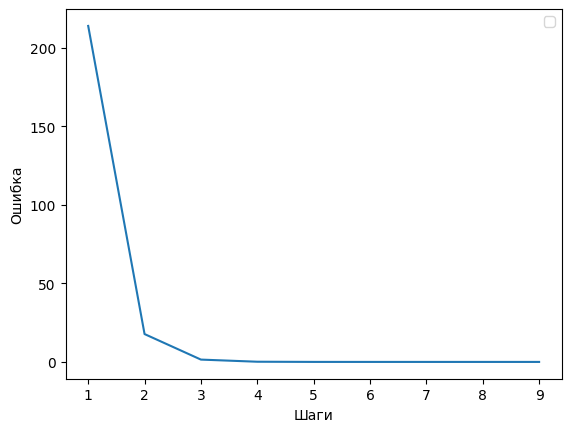

In [71]:
# Проверка для каждого α
for alpha in alphas:
    print(f'alpha = {alpha}')
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)
    hyp.plot(steps, errors)

b0 = 7, b1 = -2 

ended by finishing max_steps


C:\Users\Polyak\AppData\Local\Temp\ipykernel_15364\3423394442.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


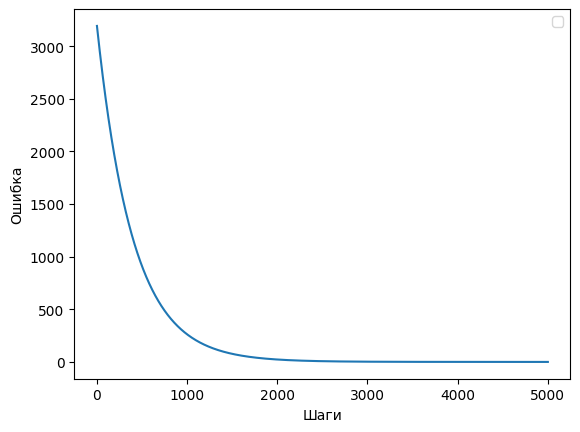

b0 = 0, b1 = 0 

ended by finishing max_steps


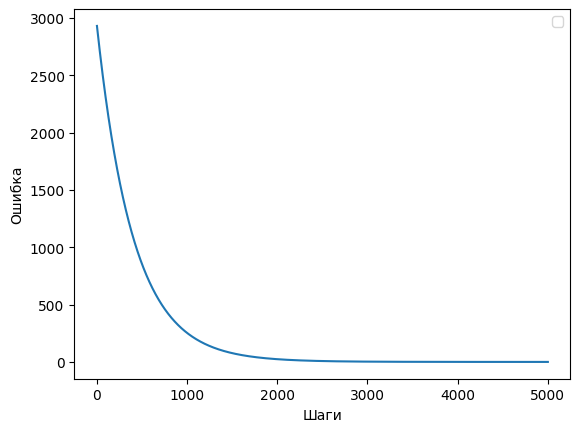

b0 = 1, b1 = 1 

ended by finishing max_steps


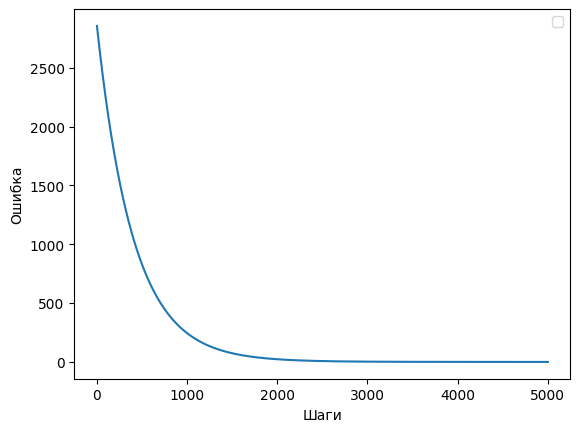

b0 = 14, b1 = 10 

ended by finishing max_steps


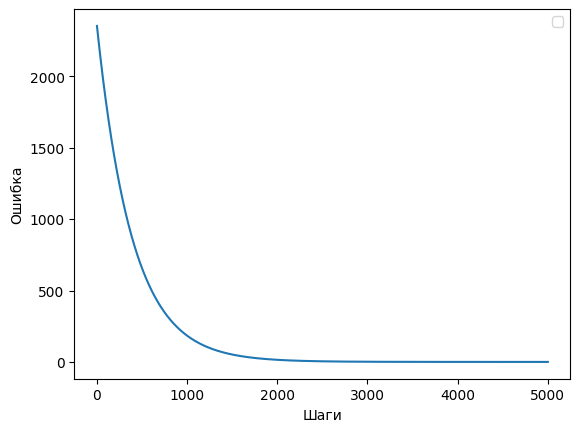

In [70]:
# Проверка для каждой комбинации начальных значений
for b0, b1 in initial_params:
    print(f'b0 = {b0}, b1 = {b1} \n')
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha=0.001)
    hyp.plot(steps, errors)